# Deep Learning

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
  
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # O Mnist é um conjunto de dados de dígitos manuscritos de 0 a 9, 
#                                                                         amplamente utilizado em aprendizado de máquina e visão computacional

# 20x20x1
# Normalização de Dados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Adicionar o canal
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


print(f'Número máximo de pixels: {np.max(x_train[0])}')
print(f'Número mínimo de pixels: {np.min(x_train[0])}')

Número máximo de pixels: 255.0
Número mínimo de pixels: 0.0


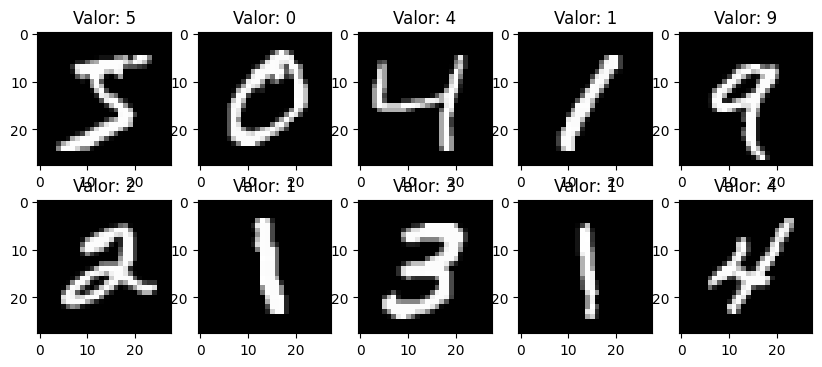

In [33]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Valor: {y_train[i]}')
plt.show()

# CNN

In [ ]:
model = keras.Sequential([
  keras.Input(shape=(28,28,1)),
  layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 18, 18, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 576, but received input with shape (None, 1600)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
score = model.evaluate(x_test, y_test, verbose=8)

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.title('Evolução do Treinamento')
plt.show()

In [30]:
imagens_teste = x_test[:10]
rotulos_reais = y_test[:10]

previsoes = model.predict(imagens_teste)

plt.figure(figsize=(12,5))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(imagens_teste[i].reshape(28,28), cmap="gray")

  previsao_digito = np.argmax(previsoes[i])
  real_digito = rotulos_reais[i]

  cor = 'green' if previsao_digito == real_digito else 'red'
  plt.title(f'Real: {real_digito}, Predito: {previsao_digito}', color=cor)
  plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_14" is incompatible with the layer: expected axis -1 of input shape to have value 576, but received input with shape (10, 1600)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(10, 28, 28, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>